# Лабораторная работа №5
Группа 45/2
---

**Импорт библиотек**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

**Задание 1.**
Загрузить датасет "Iris" из библиотеки scikitlearn (load_iris).

In [22]:
# Загрузка датасета
iris = load_iris()

**Задание 2.**
Изучить структуру и содержание данных.

In [23]:
# Описание данных
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
# Основные ключи в объекте iris
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [25]:
print("Первые 5 строк данных:")
print(iris.data[:5])
print("\nПервые 5 меток:")
print(iris.target[:5])


Первые 5 строк данных:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Первые 5 меток:
[0 0 0 0 0]


In [26]:
print("Имена признаков:")
print(iris.feature_names)
print("\nИмена классов:")
print(iris.target_names)

Имена признаков:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Имена классов:
['setosa' 'versicolor' 'virginica']


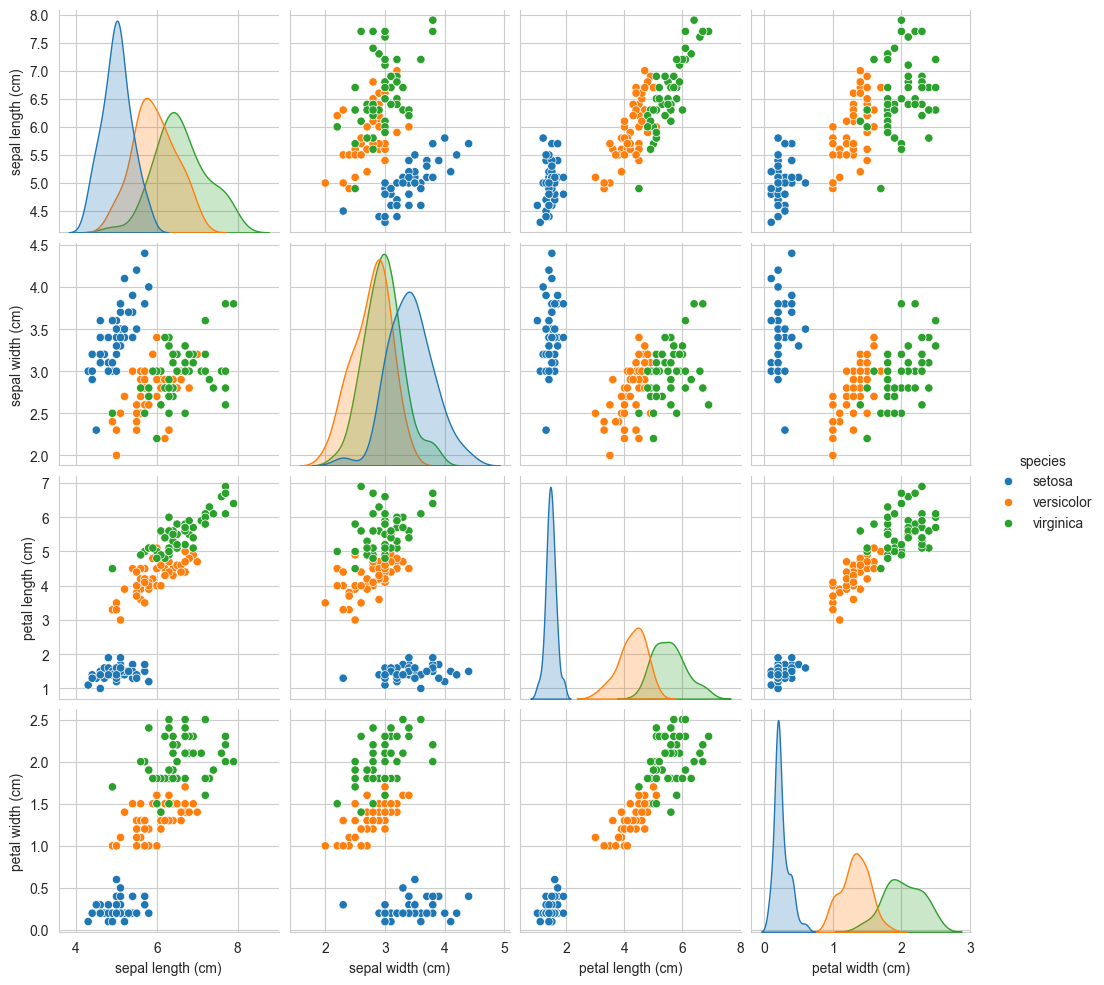

In [27]:
# Преобразование данных в DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

# Построение графиков
sns.pairplot(df, hue='species')
plt.show()

**Задание 3.**
Провести предварительный анализ данных, включая проверку наличия пропущенных значений и корреляции между переменными.

In [28]:
# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()
print("Количество пропущенных значений по признакам:")
print(missing_values)

Количество пропущенных значений по признакам:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [29]:
# Анализ корреляции между переменными
correlation_matrix = df.drop('species', axis=1).corr()
print("Матрица корреляции:")
print(correlation_matrix)

Матрица корреляции:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


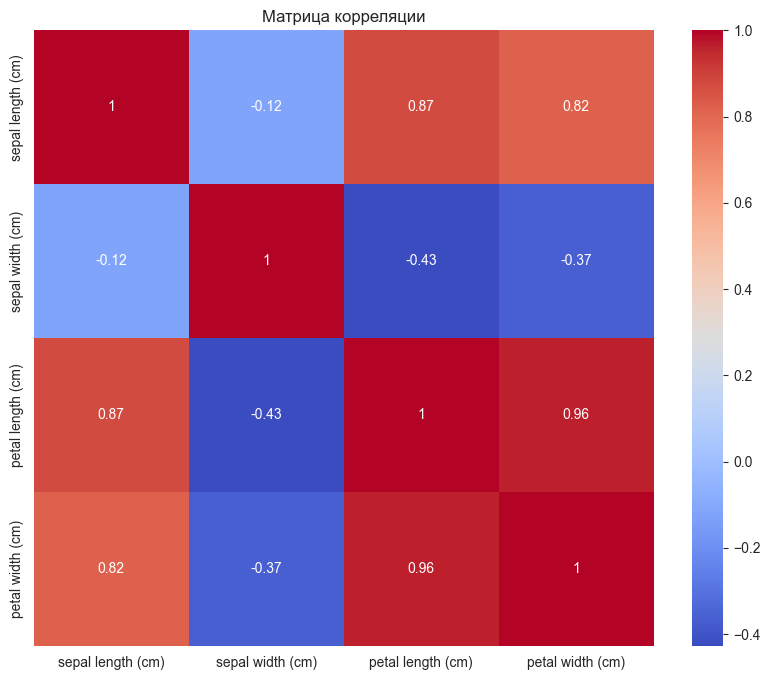

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

**Задание 4.**
Разбить данные на обучающую и тестовую выборки в соотношении 70/30.
Здесь:
*test_size=0.3* указывает на то, что 30% данных будут использоваться для тестовой выборки.
*random_state=42* — это произвольное число, чтобы обеспечить воспроизводимость разбиения.
*X_train* и *y_train* для обучения модели, а также X_test и y_test для проверки ее качества.

In [31]:
# Выделение признаков и меток
X = df.drop('species', axis=1)
y = iris.target

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(X_train))
print("Размер тестовой выборки:", len(X_test))

Размер обучающей выборки: 105
Размер тестовой выборки: 45


**Задание 5.**
Обучить модель логистической регрессии (LogisticRegression) на обучающей выборке.

In [32]:
logreg = LogisticRegression(max_iter=500)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Среднее арифметическое обучение модели

In [33]:
np.mean(cross_val_score(logreg, X_train, y_train, cv=10))

0.9627272727272727

**Задание 6.**
Оценить качество модели на тестовой выборке с помощью метрик таких как точность, полнота, F1-мера и матрица ошибок (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
Использую параметр average='macro' для усреднения метрик по всем классам. Можно также рассмотреть другие способы усреднения, например, micro или weighted.

In [34]:
# Предсказания модели для тестовой выборки
y_pred = logreg.predict(X_test)

# Точность
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy): {accuracy:.4f}")

# Precision, Recall и F1-мера
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Точность (Precision): {precision:.4f}")
print(f"Полнота (Recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

Точность (Accuracy): 1.0000
Точность (Precision): 1.0000
Полнота (Recall): 1.0000
F1-мера: 1.0000
Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Задание 7.**
Визуализировать результаты предсказания, сравнив исходные значения классов цветков и предсказанные значения.

Визуализация матрицы ошибок


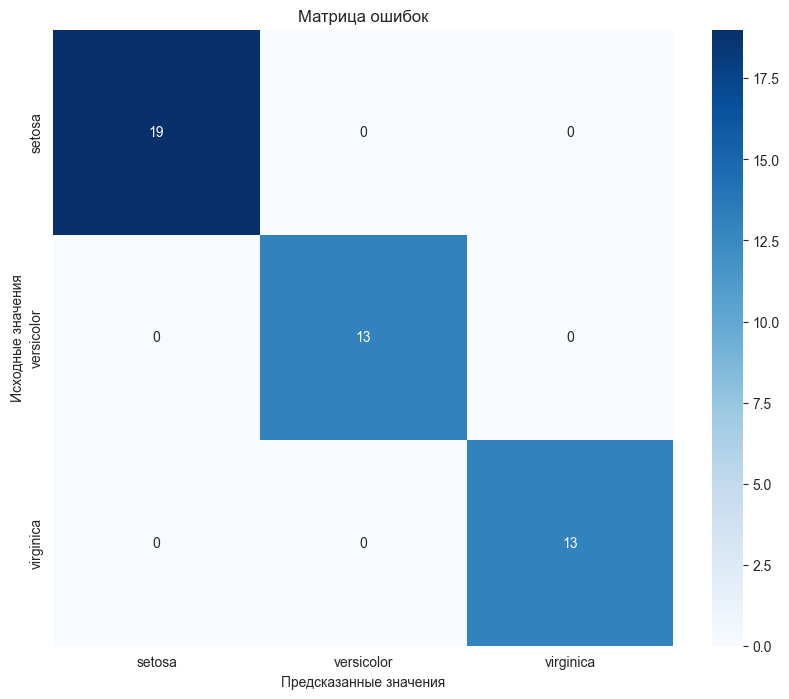

In [35]:
# Создание heatmap для матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Предсказанные значения')
plt.ylabel('Исходные значения')
plt.title('Матрица ошибок')
plt.show()

Визуализация исходных и предсказанных значений на графиках.
Здесь используются первые два признака (длина чашелистика и ширина чашелистика) для визуализации. Цвет точек отображает класс цветка. На первом графике показаны исходные классы, а на втором — предсказанные моделью классы.

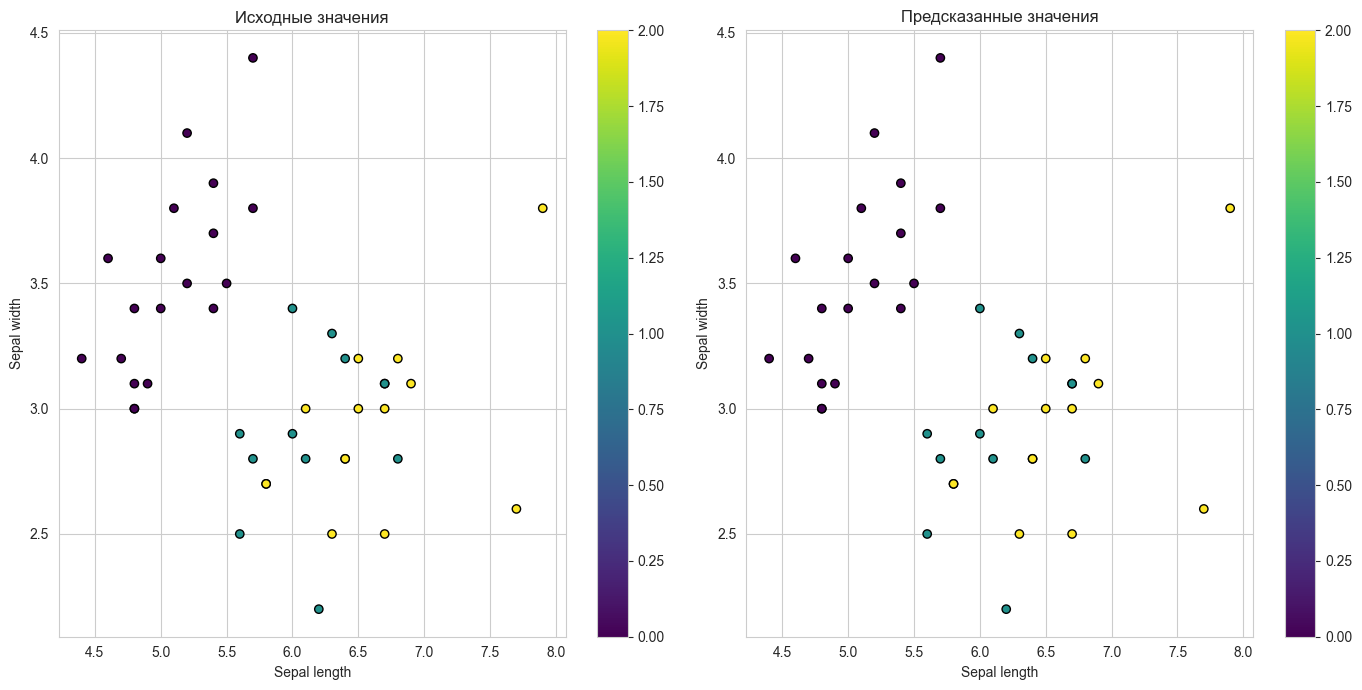

In [36]:
# Выбор двух признаков для визуализации
feature_x = X_test.iloc[:, 0].values
feature_y = X_test.iloc[:, 1].values

plt.figure(figsize=(14, 7))

# Исходные значения
plt.subplot(1, 2, 1)
plt.scatter(feature_x, feature_y, c=y_test, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Исходные значения')
plt.colorbar()

# Предсказанные значения
plt.subplot(1, 2, 2)
plt.scatter(feature_x, feature_y, c=y_pred, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Предсказанные значения')
plt.colorbar()

plt.tight_layout()
plt.show()


**Задание 8.**
Провести кросс-валидацию модели и оценить ее качество с помощью метрик точности, полноты, F1-меры и матрицы ошибок.

Выполнение кросс-валидации с 5 фолдами .
Проведу кросс-валидацию и получим предсказанные значения для всего набора данных

In [37]:
y_pred_cv = cross_val_predict(logreg, X, y, cv=5)

Оценка качества модели с использованием метрик.


In [38]:
# Точность
accuracy_cv = accuracy_score(y, y_pred_cv)
print(f"Точность (Accuracy) после кросс-валидации: {accuracy_cv:.4f}")

# Precision, Recall и F1-мера
precision_cv = precision_score(y, y_pred_cv, average='macro')
recall_cv = recall_score(y, y_pred_cv, average='macro')
f1_cv = f1_score(y, y_pred_cv, average='macro')

print(f"Точность (Precision) после кросс-валидации: {precision_cv:.4f}")
print(f"Полнота (Recall) после кросс-валидации: {recall_cv:.4f}")
print(f"F1-мера после кросс-валидации: {f1_cv:.4f}")

# Матрица ошибок
conf_matrix_cv = confusion_matrix(y, y_pred_cv)
print("Матрица ошибок после кросс-валидации:")
print(conf_matrix_cv)

Точность (Accuracy) после кросс-валидации: 0.9733
Точность (Precision) после кросс-валидации: 0.9738
Полнота (Recall) после кросс-валидации: 0.9733
F1-мера после кросс-валидации: 0.9733
Матрица ошибок после кросс-валидации:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Визуализация матрицы ошибок

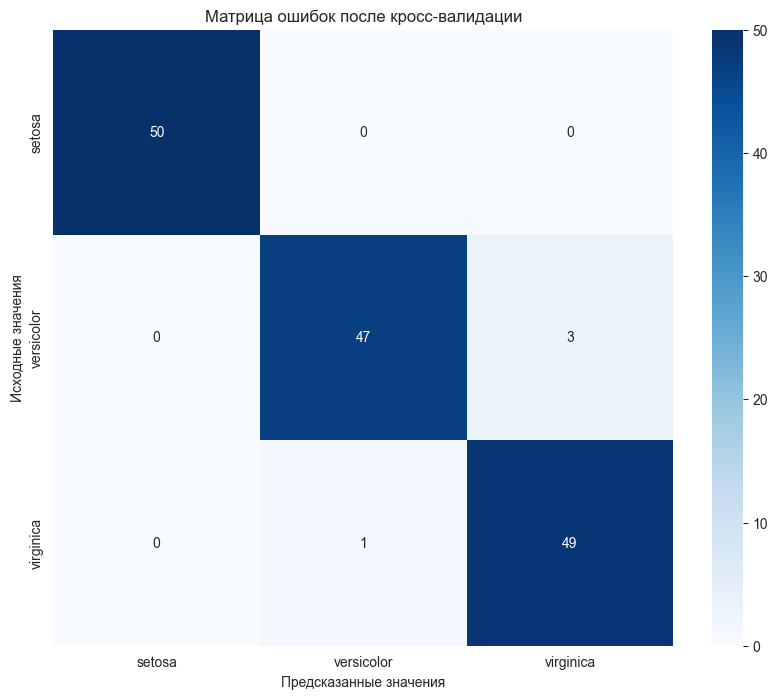

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cv, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Предсказанные значения')
plt.ylabel('Исходные значения')
plt.title('Матрица ошибок после кросс-валидации')
plt.show()

**Задание 9.**
Попробовать улучшить качество модели путем вариации параметров модели или использования других моделей (например, к- ближайших соседей (KNeighborsClassifier),метода опорных векторов (SVMClassifier) или случайного леса (RandomForestClassifier)).

Для себя про модели:
1. **KNN (k=3) - k-ближайших соседей**
   - **Что это такое?** Представьте, что у вас есть карта, на которой отмечены точки разных цветов. Если на этой карте появляется новая точка без цвета, то чтобы определить, какой цвет у этой точки, вы смотрите на 3 точки, которые находятся ближе всего к новой. Если 2 из 3 ближайших соседей зеленые, а один красный, то новая точка, вероятно, тоже зеленая.
   - **Зачем "k=3"?** Число "3" в "k=3" говорит нам о том, сколько ближайших соседей мы рассматриваем. В этом примере рассматриваются 3 соседа.

2. **SVM (linear kernel) - метод опорных векторов с линейным ядром**
   - **Что это такое?** Представьте, что на столе лежат красные и синие марблы, и вы хотите провести прямую линию, чтобы отделить один цвет от другого так, чтобы между линией и каждым из цветов было максимальное расстояние. SVM именно это и делает – находит лучшую линию (или, в более сложных случаях, плоскость) для разделения данных на категории.
   - **Почему "линейное ядро"?** Ядро определяет, как SVM будет искать границу между данными. "Линейное" означает, что граница будет прямой линией (или плоскостью в пространствах с большим количеством измерений).

3. **Random Forest (100 trees) - случайный лес из 100 деревьев**
   - **Что это такое?** Представьте, что у вас есть 100 друзей, и каждый из них решает одну и ту же задачу, но использует только часть информации. После того, как все друзья приняли решение, вы подсчитываете, какой ответ был выбран чаще всего, и считаете этот ответ окончательным. Случайный лес делает то же самое, но вместо друзей использует деревья решений.
   - **Почему "100 деревьев"?** Это количество деревьев, которое модель использует для принятия решения. Больше деревьев может улучшить точность, но также увеличит время вычислений.

In [40]:
# Создание словаря с различными классификаторами
classifiers = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'SVM (linear kernel)': SVC(kernel='linear', probability=True),
    'Random Forest (100 trees)': RandomForestClassifier(n_estimators=100)
}

# Оценка каждой модели
for name, clf in classifiers.items():
    # Проведение кросс-валидации и получение предсказаний
    y_pred_clf = cross_val_predict(clf, X, y, cv=5)

    # Вычисление основных метрик
    accuracy_clf = accuracy_score(y, y_pred_clf)
    precision_clf = precision_score(y, y_pred_clf, average='macro')
    recall_clf = recall_score(y, y_pred_clf, average='macro')
    f1_clf = f1_score(y, y_pred_clf, average='macro')

    # Вывод результатов
    print(f"---- {name} ----")
    print(f"Точность (Accuracy): {accuracy_clf:.4f}")
    print(f"Точность (Precision): {precision_clf:.4f}")
    print(f"Полнота (Recall): {recall_clf:.4f}")
    print(f"F1-мера: {f1_clf:.4f}\n")

---- KNN (k=3) ----
Точность (Accuracy): 0.9667
Точность (Precision): 0.9668
Полнота (Recall): 0.9667
F1-мера: 0.9667

---- SVM (linear kernel) ----
Точность (Accuracy): 0.9800
Точность (Precision): 0.9801
Полнота (Recall): 0.9800
F1-мера: 0.9800

---- Random Forest (100 trees) ----
Точность (Accuracy): 0.9600
Точность (Precision): 0.9600
Полнота (Recall): 0.9600
F1-мера: 0.9600



**Задание 10.**
Сделать выводы о качестве модели и ее применимости для классификации типов цветков Iris.

1. **Модель логистической регрессии на тестовой выборке**:
   - Результаты показывают идеальную классификацию для тестовой выборки, где все метрики равны 1.0000. Это может говорить о том, что модель отлично справилась с тестовой выборкой, но есть риск, что такое идеальное значение может указывать на переобучение.

2. **После кросс-валидации**:
   - Метрики после кросс-валидации чуть ниже, чем на тестовой выборке, но всё равно довольно высоки (около 0.9733). Говорит о том, что модель действительно хорошо обобщает данные и не переобучена.
   - Небольшие ошибки в матрице ошибок показывают, что модель иногда путает некоторые классы, но это довольно редко.

3. **Сравнение с другими моделями**:
   - **KNN (k=3)**: Эта модель показывает высокую точность, хотя она немного ниже, чем у логистической регрессии после кросс-валидации.
   - **SVM (linear kernel)**: Показывает результаты, очень близкие к логистической регрессии после кросс-валидации, и может быть альтернативой ей.
   - **Random Forest (100 trees)**: Данные показывают, что случайный лес также является хорошей моделью, хотя его точность немного ниже, чем у SVM и логистической регрессии.

**Итоги**:
- Модель логистической регрессии отлично справилась с задачей классификации цветков Iris на предоставленной тестовой выборке.
- Кросс-валидация показала, что модель хорошо обобщает данные, несмотря на небольшое уменьшение точности.
- Остальные рассмотренные модели (KNN, SVM, Random Forest) также показали высокую эффективность, что говорит о том, что набор данных Iris довольно хорошо структурирован и разделим.